In [60]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('./model_results.csv')
df.head()

,model,AP @ [0.50:0.95|all|100],AP @ [0.50|all|1000],AP @ [0.75|all|1000],AP @ [0.50:0.95|small|1000],AP @ [0.50:0.95|medium|1000],AP @ [0.50:0.95|large|1000],AR @ [0.50:0.95|all|100],AR @ [0.50:0.95|all|300],AR @ [0.50:0.95|all|1000],AR @ [0.50:0.95|small|1000],AR @ [0.50:0.95|medium|1000],AR @ [0.50:0.95|large|1000]
0,YOLO v3,0.279,0.491,0.283,0.105,0.301,0.438,0.395,0.395,0.395,0.185,0.423,0.574
1,SSD,0.255,0.436,0.262,0.069,0.275,0.423,0.373,0.375,0.375,0.124,0.414,0.586
2,Faster R-CNN,0.374,0.581,0.404,0.212,0.410,0.481,0.517,0.517,0.517,0.326,0.557,0.648
3,Mask R-CNN,0.382,0.588,0.414,0.219,0.409,0.495,0.524,0.524,0.524,0.329,0.557,0.662
4,Sparse R-CNN,0.279,0.491,0.283,0.105,0.301,0.438,0.395,0.395,0.395,0.185,0.423,0.574


In [62]:
# Filter the DataFrame to create separate DataFrames for AP metrics
ap_df = df.filter(regex='^AP')
ap_df = pd.concat([df['model'], ap_df], axis=1)
ap_df.head()

,model,AP @ [0.50:0.95|all|100],AP @ [0.50|all|1000],AP @ [0.75|all|1000],AP @ [0.50:0.95|small|1000],AP @ [0.50:0.95|medium|1000],AP @ [0.50:0.95|large|1000]
0,YOLO v3,0.279,0.491,0.283,0.105,0.301,0.438
1,SSD,0.255,0.436,0.262,0.069,0.275,0.423
2,Faster R-CNN,0.374,0.581,0.404,0.212,0.410,0.481
3,Mask R-CNN,0.382,0.588,0.414,0.219,0.409,0.495
4,Sparse R-CNN,0.279,0.491,0.283,0.105,0.301,0.438


In [63]:
# Filter the DataFrame to create separate DataFrames for AR metrics
ar_df = df.filter(regex='^AR')
ar_df = pd.concat([df['model'], ar_df], axis=1)
ar_df.head()

,model,AR @ [0.50:0.95|all|100],AR @ [0.50:0.95|all|300],AR @ [0.50:0.95|all|1000],AR @ [0.50:0.95|small|1000],AR @ [0.50:0.95|medium|1000],AR @ [0.50:0.95|large|1000]
0,YOLO v3,0.395,0.395,0.395,0.185,0.423,0.574
1,SSD,0.373,0.375,0.375,0.124,0.414,0.586
2,Faster R-CNN,0.517,0.517,0.517,0.326,0.557,0.648
3,Mask R-CNN,0.524,0.524,0.524,0.329,0.557,0.662
4,Sparse R-CNN,0.395,0.395,0.395,0.185,0.423,0.574


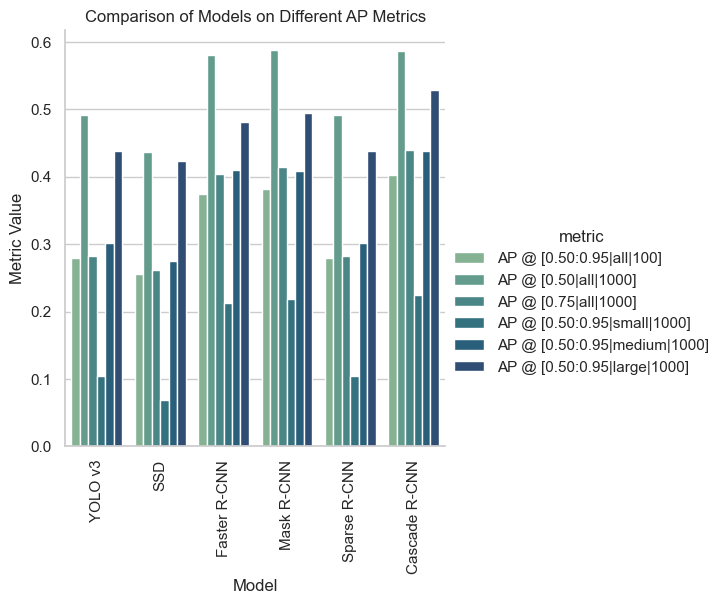

In [64]:
# Melt the DataFrame to convert the metrics into columns and their values into rows
melted_df = pd.melt(ap_df, id_vars=['model'], var_name='metric')

# Create the grouped bar chart
sns.catplot(x='model', y='value', hue='metric', data=melted_df, kind='bar', palette='crest')

# Customize the plot
plt.title('Comparison of Models on Different AP Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(rotation=90)

# Display the plot
plt.show()

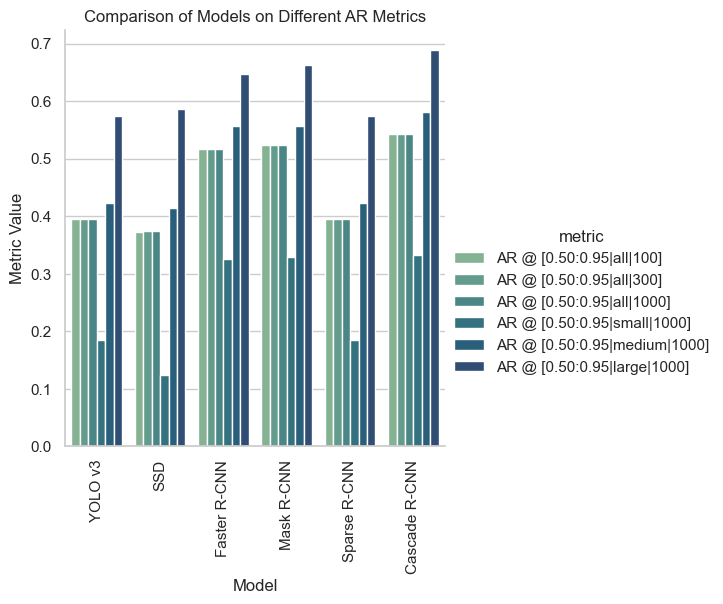

In [65]:
# Melt the DataFrame to convert the metrics into columns and their values into rows
melted_df = pd.melt(ar_df, id_vars=['model'], var_name='metric')

# Create the grouped bar chart
sns.catplot(x='model', y='value', hue='metric', data=melted_df, kind='bar', palette='crest')

# Customize the plot
plt.title('Comparison of Models on Different AR Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Filter Metrics

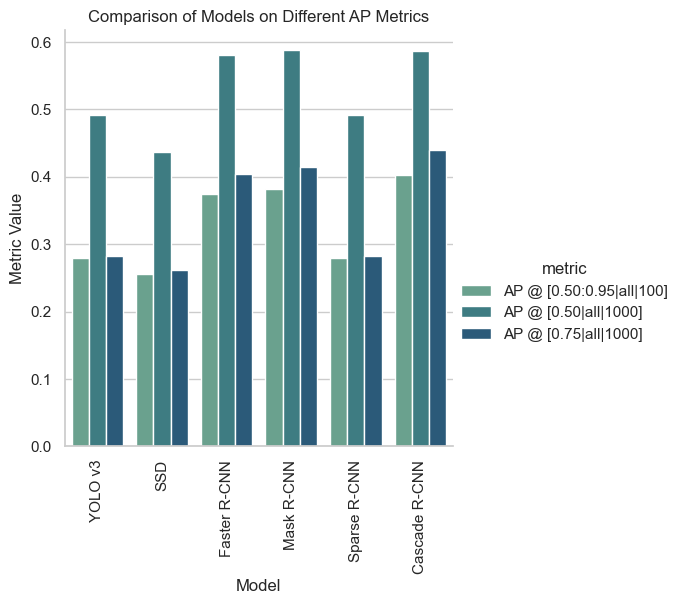

In [66]:
# Filter to model, + first 3 columns
ap_filtered_df = ap_df.iloc[:, :4]

# Melt the DataFrame to convert the metrics into columns and their values into rows
melted_df = pd.melt(ap_filtered_df, id_vars=['model'], var_name='metric')

# Create the grouped bar chart
sns.catplot(x='model', y='value', hue='metric', data=melted_df, kind='bar', palette='crest')

# Customize the plot
plt.title('Comparison of Models on Different AP Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(rotation=90)

# Display the plot
plt.show()